Dataset: Class0=501, Class1=499
Train: Class0=10, Class1=249
No Skill ROC AUC 0.909
Logistic ROC AUC 0.763


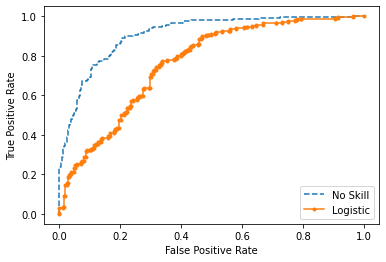

In [19]:
# roc curve and roc auc on an imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import numpy as np

# plot no skill and model roc curves
def plot_roc_curve(test_y, naive_probs, model_probs):
	# plot naive skill roc curve
	fpr, tpr, _ = roc_curve(test_y, naive_probs)
	pyplot.plot(fpr, tpr, linestyle='--', label='No Skill')
	# plot model roc curve
	fpr, tpr, _ = roc_curve(test_y, model_probs)
	pyplot.plot(fpr, tpr, marker='.', label='Logistic')
	# axis labels
	pyplot.xlabel('False Positive Rate')
	pyplot.ylabel('True Positive Rate')
	# show the legend
	pyplot.legend()
	# show the plot
	pyplot.show()



#balanced data 
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets with same class ratio
trainX_b, testX_b, trainy_b, testy_b = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)


##remove some data
trainX = trainX_b[0:-1]
trainy = trainy_b[0:-1]
for i in range(240):
    for inx,_ in enumerate(trainy):
        if trainy[inx] == 0: 
            trainX = np.delete(trainX,inx,0)
            trainy = np.delete(trainy,inx,0)
            break
            
print('Dataset: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Train: Class0=%d, Class1=%d' % (len(trainy[trainy==0]), len(trainy[trainy==1])))

# no skill model, stratified random class predictions
model = LogisticRegression(solver='lbfgs')
model.fit(trainX_b, trainy_b)
yhat = model.predict_proba(testX_b)
naive_probs = yhat[:, 1]
# calculate roc auc
roc_auc = roc_auc_score(testy_b, naive_probs)
print('No Skill ROC AUC %.3f' % roc_auc)
# skilled model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
yhat = model.predict_proba(testX_b)
model_probs = yhat[:, 1]
# calculate roc auc
roc_auc = roc_auc_score(testy_b, model_probs)
print('Logistic ROC AUC %.3f' % roc_auc)
# plot roc curves
plot_roc_curve(testy_b, naive_probs, model_probs)